In [12]:
import string
import numpy as np
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter
import itertools
import pickle

%matplotlib inline

In [2]:
fhr = open('../datasets/amazon-meta.txt', 'r', encoding='utf-8', errors='ignore')


columns = ['Title', 'Categories', 'Group', 'SalesRank', 'TotalReviews', 'AvgRating']
MetaData = dict(zip(columns, [[] for i in columns]))


(Id, ASIN, Title, Categories, Group, Copurchased, SalesRank, TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff) = \
    ("", "", "", "", "", "", 0, 0, 0.0, 0, 0.0)
for line in tqdm(fhr):
    line = line.strip()
    # a product block started
    if(line.startswith("title")):
        Title = line[6:].strip()
        Title = ' '.join(Title.split())
    elif(line.startswith("group")):
        Group = line[6:].strip()
    elif(line.startswith("salesrank")):
        SalesRank = line[10:].strip()
    elif(line.startswith("categories")):
        ls = line.split()
        Categories = ' '.join((fhr.readline()).lower() for i in range(int(ls[1].strip())))
        Categories = re.compile('[%s]' % re.escape(string.digits+string.punctuation)).sub(' ', Categories)
    elif(line.startswith("reviews")):
        ls = line.split()
        TotalReviews = ls[2].strip()
        AvgRating = ls[7].strip()
    elif (line==""):
        try:
            MetaData['Title'].append(Title)
            MetaData['Categories'].append(' '.join(set(Categories.split())))
            MetaData['Group'].append(Group)
            MetaData['SalesRank'].append(int(SalesRank))
            MetaData['TotalReviews'].append(int(TotalReviews))
            MetaData['AvgRating'].append(float(AvgRating))
        except NameError as err:
            print(err)
            continue
        (Id, ASIN, Title, Categories, Group, Copurchased, SalesRank, TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff) = \
            ("", "", "", "", "", "", 0, 0, 0.0, 0, 0.0)
fhr.close()

12500875it [02:35, 80485.85it/s] 


In [3]:
import pandas as pd

md_df = pd.DataFrame(MetaData)

100%|██████████| 548553/548553 [00:13<00:00, 40460.75it/s]


[('general', 448253),
 ('books', 376455),
 ('subjects', 370828),
 ('stores', 154287),
 ('music', 121204),
 ('s', 106862),
 ('styles', 102125),
 ('com', 96186),
 ('amazon', 96163),
 ('specialty', 83755),
 ('fiction', 78129),
 ('home', 65774),
 ('a', 64002),
 ('literature', 63486),
 ('nonfiction', 63358),
 ('categories', 59054),
 ('genres', 55691),
 ('science', 55409),
 ('z', 55291),
 ('history', 53605),
 ('children', 50776),
 ('reference', 47687),
 ('religion', 44810),
 ('spirituality', 44593),
 ('professional', 42907),
 ('technical', 42248),
 ('authors', 41466),
 ('special', 39059),
 ('health', 38256),
 ('travel', 37649),
 ('office', 36954),
 ('by', 36757),
 ('all', 36047),
 ('titles', 34863),
 ('rock', 34509),
 ('business', 34469),
 ('body', 34468),
 ('mind', 34452),
 ('sciences', 34027),
 ('indie', 33236),
 ('formats', 30438),
 ('arts', 29993),
 ('investing', 29580),
 ('in', 29482),
 ('outlet', 29345),
 ('international', 28688),
 ('deals', 28311),
 ('today', 28306),
 ('b', 28099),
 (

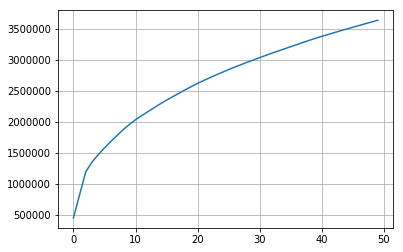

In [4]:
def cnt_cat():
    ans = Counter()
    for line in tqdm(md_df.Categories):
        ans.update(line.split())
    return ans

def cnt_lens():
    return [len(line.split()) for line in tqdm(md_df.Categories)]

cnt = cnt_cat()
vals = sorted(list(cnt.values()))[::-1]

import numpy as np
partial = np.cumsum(vals)[:50]
plt.grid(True)
plt.plot(partial)
# home, children
# science
# religion, spirituality
# типа дом и дети, науки, музыка и т.п., религиозная литература, ...

cnt.most_common(100)

In [5]:
md_df.Group.value_counts()

Book            393561
Music           103144
Video            26131
DVD              19828
                  5869
Toy                  8
Software             5
CE                   4
Sports               1
Video Games          1
Baby Product         1
Name: Group, dtype: int64

(array([313049., 119805.,  56721.,  27523.,  13101.,   7070.,   4426.,
          2850.,   3248.,    760.]),
 array([-1.0000000e+00,  3.7983420e+05,  7.5966940e+05,  1.1395046e+06,
         1.5193398e+06,  1.8991750e+06,  2.2790102e+06,  2.6588454e+06,
         3.0386806e+06,  3.4185158e+06,  3.7983510e+06]),
 <a list of 10 Patch objects>)

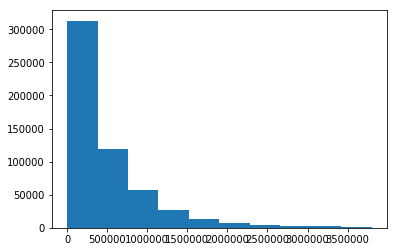

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(md_df.SalesRank)

(array([6.37100e+03, 9.00000e+00, 1.06000e+02, 6.12000e+02, 3.14600e+03,
        1.50980e+04, 5.90130e+04, 1.27225e+05, 2.35219e+05, 1.01754e+05]),
 array([ 0.        ,  1.51500781,  3.03001562,  4.54502343,  6.06003124,
         7.57503905,  9.09004687, 10.60505468, 12.12006249, 13.6350703 ,
        15.15007811]),
 <a list of 10 Patch objects>)

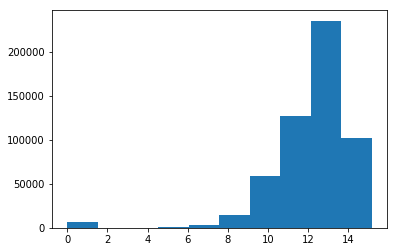

In [7]:
plt.hist(np.log(md_df.SalesRank + 2))

(array([2.26858e+05, 1.28288e+05, 9.94340e+04, 5.07940e+04, 2.45780e+04,
        1.14080e+04, 4.97000e+03, 1.70800e+03, 4.28000e+02, 8.70000e+01]),
 array([0.        , 0.86208322, 1.72416645, 2.58624967, 3.44833289,
        4.31041611, 5.17249934, 6.03458256, 6.89666578, 7.758749  ,
        8.62083223]),
 <a list of 10 Patch objects>)

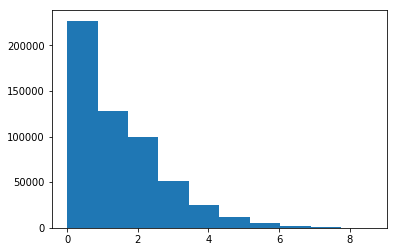

In [8]:
plt.hist(np.log(md_df.TotalReviews.values + 1))

(array([145818.,      0.,   2732.,    837.,   4117.,   6561.,  21227.,
         34405.,  83458., 249398.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

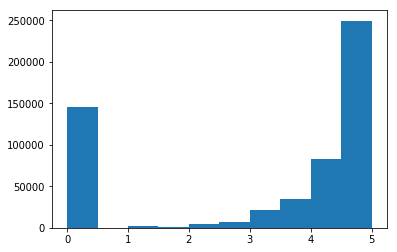

In [9]:
plt.hist(md_df.AvgRating)

In [10]:
"""
is_Book, is_Music, is_Video_or_DVD, np.log(SalesRank + 2), np.log(TotalReviews), AvgRating
"""

is_book = md_df.Group == 'Book'
is_music = md_df.Group == 'Music'
is_video = (md_df.Group == 'Video') | (md_df.Group == 'DVD')
logrank = np.log(-md_df.SalesRank.min() + md_df.SalesRank + 1)
logrev = np.log(-md_df.TotalReviews.min() + md_df.TotalReviews + 1)
avg_rating = md_df.AvgRating

In [17]:
submatrix = pickle.load(open('../tmp_files/title_submatrix', "rb"))
columns = [is_book, is_music, is_video, logrank, logrev, avg_rating]
for i in range(submatrix.shape[1]):
    columns.append(submatrix[:, i])
matrix = np.vstack(columns).T
matrix.shape

(548553, 10)

In [18]:
mat_l = matrix[:, :6]
mat_l = (mat_l - mat_l.mean(axis=0).reshape(1, -1)) / mat_l.std(axis=0).reshape(1, -1)
mat_l += np.random.randn(*mat_l.shape) * 1e-4
matrix[:, :6] = mat_l

mat_r = matrix[:, 6:]
mat_r = (mat_r - mat_r.mean(axis=0).reshape(1, -1)) # centered
mat_r = mat_r / mat_r.std()
matrix[:, 6:] = mat_r

In [25]:
with open("../tmp_files/amazon_mat", "w") as f:
    for row in matrix:
        for elem in row:
            print("%.8f" % elem, end=' ', file=f)
        print(file=f)